In [359]:
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [360]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

In [361]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [362]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [363]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

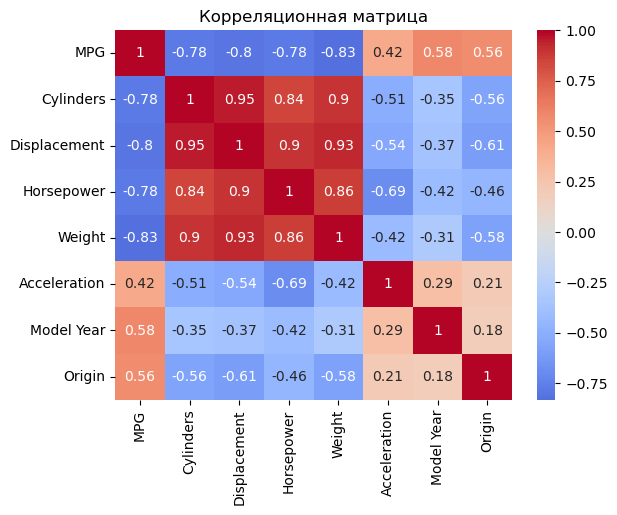

In [364]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

In [365]:
# Замена пропущенных значений в столбце 'Horsepower' на медианное значение
mean_horsepower = df['Horsepower'].median()
df['Horsepower'] = df['Horsepower'].fillna(mean_horsepower)

In [366]:
# разделение на обучающий и тестовый сегменты:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=1)

In [367]:
y_train = torch.tensor(df_train['MPG'].values).float()
y_test = torch.tensor(df_test['MPG'].values).float()

In [368]:
df_test = df_test.drop(columns=['MPG'])
df_train = df_train.drop(columns=['MPG'])

In [369]:
train_stats = df_train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.418239,1.682508,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,191.128931,102.212399,70.0,101.75,146.0,258.00,455.0
Horsepower,318.0,103.132075,37.503857,46.0,75.00,93.5,120.00,230.0
Weight,318.0,2952.047170,836.500568,1613.0,2220.75,2801.0,3533.75,5140.0
Acceleration,318.0,15.717610,2.751966,8.5,14.00,15.5,17.40,24.8
Model Year,318.0,75.921384,3.683467,70.0,73.00,76.0,79.00,82.0
Origin,318.0,1.588050,0.808150,1.0,1.00,1.0,2.00,3.0


In [370]:
df_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
298,8,350.0,125.0,3900.0,17.4,79,1
13,8,455.0,225.0,3086.0,10.0,70,1
376,4,91.0,68.0,2025.0,18.2,82,3
61,4,122.0,86.0,2226.0,16.5,72,1
346,4,97.0,67.0,2065.0,17.8,81,3
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
255,4,140.0,88.0,2720.0,15.4,78,1
72,8,304.0,150.0,3892.0,12.5,72,1
235,4,97.0,75.0,2265.0,18.2,77,3


НОРМАЛИЗАЦИЯ ЗНАЧЕНИЙ

In [371]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

In [372]:
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

def norm(x, mean, std):
    return (x - mean) / std

# Нормализация данных с использованием функции norm
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm[col_name] = norm(df_train_norm[col_name], mean, std)
    df_test_norm[col_name] = norm(df_test_norm[col_name], mean, std)

In [373]:
df_train_norm

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
298,1.534472,1.554323,0.583085,1.133236,0.611341,79,1
13,1.534472,2.581596,3.249477,0.160135,-2.077646,70,1
376,-0.842931,-0.979616,-0.936759,-1.108245,0.902042,82,3
61,-0.842931,-0.676326,-0.456808,-0.867958,0.284302,72,1
346,-0.842931,-0.920915,-0.963423,-1.060426,0.756692,81,3
...,...,...,...,...,...,...,...
393,-0.842931,-0.500222,-0.456808,-0.193720,-0.042737,82,1
255,-0.842931,-0.500222,-0.403481,-0.277402,-0.115412,78,1
72,1.534472,1.104280,1.249683,1.123673,-1.169204,72,1
235,-0.842931,-0.920915,-0.750112,-0.821335,0.902042,77,3


Преобразование признака "Model Year"

In [374]:
df["Model Year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [375]:
df["Model Year"].value_counts(ascending=True)

Model Year
74    27
71    28
72    28
77    28
70    29
79    29
80    29
81    29
75    30
82    31
76    34
78    36
73    40
Name: count, dtype: int64

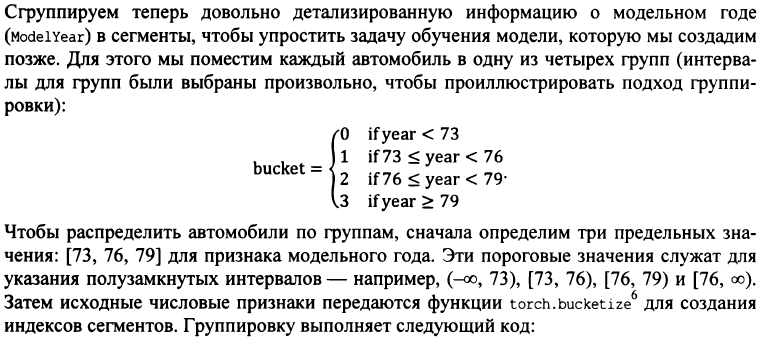

In [376]:
boundaries = torch.tensor([73, 76, 79])

v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

numeric_column_names.append('Model Year Bucketed')

In [377]:
df_train_norm

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
298,1.534472,1.554323,0.583085,1.133236,0.611341,79,1,3
13,1.534472,2.581596,3.249477,0.160135,-2.077646,70,1,0
376,-0.842931,-0.979616,-0.936759,-1.108245,0.902042,82,3,3
61,-0.842931,-0.676326,-0.456808,-0.867958,0.284302,72,1,0
346,-0.842931,-0.920915,-0.963423,-1.060426,0.756692,81,3,3
...,...,...,...,...,...,...,...,...
393,-0.842931,-0.500222,-0.456808,-0.193720,-0.042737,82,1,3
255,-0.842931,-0.500222,-0.403481,-0.277402,-0.115412,78,1,2
72,1.534472,1.104280,1.249683,1.123673,-1.169204,72,1,0
235,-0.842931,-0.920915,-0.750112,-0.821335,0.902042,77,3,2


преобразование признака "Origin"

In [378]:
# # One-hot encoding для столбца 'Origin' в df_train_norm
# df_train_norm_encoded = pd.get_dummies(df_train_norm, columns=['Origin'], prefix='Origin')

# # One-hot encoding для столбца 'Origin' в df_test_norm
# df_test_norm_encoded = pd.get_dummies(df_test_norm, columns=['Origin'], prefix='Origin')

In [379]:
# Функция one-hot кодирования
def one_hot(df, column, total):
    return F.one_hot(torch.from_numpy(df[column].values % total).long())

total_origin = len(set(df_train_norm['Origin']))

# One-hot кодирование для столбца 'Origin' в обучающем наборе данных
origin_encoded = one_hot(df_train_norm, 'Origin', total_origin)
# Преобразование числовых данных в тензор для обучающего набора данных
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
# Конкатенация one-hot закодированных и числовых данных для обучающего набора данных
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

# One-hot кодирование для столбца 'Origin' в тестовом наборе данных
origin_encoded = one_hot(df_test_norm, 'Origin', total_origin)
# Преобразование числовых данных в тензор для тестового набора данных
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
# Конкатенация one-hot закодированных и числовых данных для тестового набора данных
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

ОБУЧЕНИЕ

In [380]:
from torch.utils.data import TensorDataset, DataLoader

# Создание TensorDataset
train_ds = TensorDataset(x_train, y_train)

# Определение размера пакета
batch_size = 8

# Установка начального значения для генератора случайных чисел
torch.manual_seed(1)

# Создание DataLoader
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [381]:
# import torch.nn as nn

# # Определение количества нейронов в скрытых слоях
# hidden_units = [8, 4]

# # Получение размера входного слоя из формы входных данных
# input_size = x_train.shape[1]

# # Инициализация списка для хранения слоев
# all_layers = []

# # Создание слоев сети
# for hidden_unit in hidden_units:
#     # Добавление линейного слоя
#     layer = nn.Linear(input_size, hidden_unit)
#     all_layers.append(layer)

#     # Добавление функции активации ReLU
#     all_layers.append(nn.ReLU())

#     # Обновление размера входного слоя для следующего слоя
#     input_size = hidden_unit

# # Добавление последнего линейного слоя
# all_layers.append(nn.Linear(hidden_units[-1], 1))

# # Создание модели как последовательности слоев
# model = nn.Sequential(*all_layers)

# model

In [382]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 8)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(8, 4)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(4, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.output(x)
        return x

# Пример создания модели
input_size = x_train.shape[1]
model = SimpleNN(input_size)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [396]:
# Установка начального значения для генератора случайных чисел
torch.manual_seed(1)

# Определение общего количества эпох и количества эпох для логирования
num_epochs = 200
log_epochs = 20

# Цикл обучения модели
for epoch in range(num_epochs):
    # Инициализация переменной для хранения суммарной потери на эпохе
    loss_hist_train = 0

    # Итерация по пакетам данных из DataLoader
    for x_batch, y_batch in train_dl:
        # Обнуление градиентов
        optimizer.zero_grad()
        
        # Предсказание модели
        pred = model(x_batch)

        # Вычисление функции потерь
        loss = loss_fn(pred, y_batch.unsqueeze(1))

        # Обратное распространение ошибки
        loss.backward()

        # Шаг оптимизатора
        optimizer.step()

        # Добавление потери текущего пакета к общей потере эпохи
        loss_hist_train += loss.item()

    # Логирование потерь каждые log_epochs эпох
    if epoch % log_epochs == 0:
        # Вывод текущей эпохи и средней потери на эпохе
        print(f"Эпоха {epoch} Потеря: {loss_hist_train / len(train_dl):.4f}")


Эпоха 0 Потеря: 5.6558
Эпоха 20 Потеря: 5.7772
Эпоха 40 Потеря: 5.8010
Эпоха 60 Потеря: 5.4869
Эпоха 80 Потеря: 5.5692
Эпоха 100 Потеря: 5.8406
Эпоха 120 Потеря: 5.4288
Эпоха 140 Потеря: 5.5946
Эпоха 160 Потеря: 5.5297
Эпоха 180 Потеря: 5.4895


In [391]:
#Гистограмма распределения ошибок (Residuals)
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Ошибка (Residual)')
    plt.ylabel('Частота')
    plt.title('Распределение ошибок (Residuals)')
    plt.grid(True)
    plt.show()

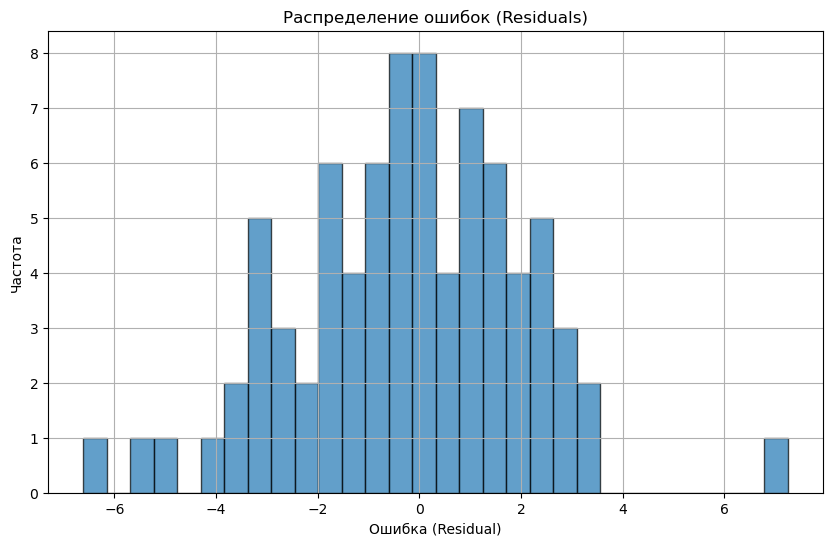

In [397]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    y_true = y_test.numpy()
    y_pred = pred.numpy()

plot_residuals(y_true, y_pred)

In [398]:
# Отключение вычисления градиентов
with torch.no_grad():
    # Предсказание модели на тестовых данных
    pred = model(x_test.float())[:, 0]

    # Вычисление функции потерь
    loss = loss_fn(pred, y_test)

    # Вывод среднеквадратичной ошибки (MSE)
    print(f"MSE при тестировании: {loss.item():.4f}")

    # Вычисление и вывод средней абсолютной ошибки (MAE)
    mae_loss = nn.L1Loss()(pred, y_test)
    print(f"MAE при тестировании: {mae_loss.item():.4f}")

MSE при тестировании: 5.2201
MAE при тестировании: 1.7614
